
--- 1. Logistic Regression Results (Performance Categories) ---
Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

     Average       0.88      0.98      0.93        59
   Excellent       0.94      1.00      0.97        31
        High       1.00      0.97      0.98       310
         Low       0.00      0.00      0.00         0

    accuracy                           0.97       400
   macro avg       0.70      0.74      0.72       400
weighted avg       0.98      0.97      0.97       400



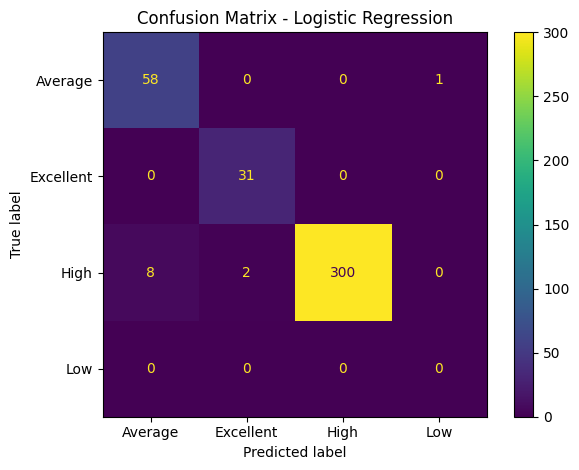

In [1]:
# LOGISTIC REGRESSION FOR PERFORMANCE CATEGORY
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE  # Used for minority class oversampling

FILE = r"C:\Data\student_scores_selected_features.csv"
df = pd.read_csv(FILE)

# --- Define Target and Features ---
target = 'performance_category'
X = df.drop(columns=[target])  # all columns EXCEPT performance_category → features
y = df[target]

# Encode target labels (required for classification_report compatibility)
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_                # e.g. ['Average', 'Excellent', 'High', 'Low']
labels = np.arange(len(class_names))     # [0, 1, 2, 3] – indices of classes

# Separate feature types
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# --- Preprocessing Pipeline ---
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# --- Split and Transform ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

X_train_t = preprocessor.fit_transform(X_train)
X_test_t = preprocessor.transform(X_test)

# --- Imbalance Handling (SMOTE) ---
# Use k_neighbors=1 to prevent ValueError if the smallest class has size 2
sm = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_train_t, y_train)

# --- Model Training and Evaluation ---
log_reg = LogisticRegression(
    max_iter=2000,
    class_weight='balanced',  # Helps model predict minority classes
    n_jobs=-1
)
log_reg.fit(X_train_res, y_train_res)
y_pred = log_reg.predict(X_test_t)

print("\n--- 1. Logistic Regression Results (Performance Categories) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=labels,             # ensure all classes are included, even if some missing in y_test
    target_names=class_names,
    zero_division=0
))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=labels,
    display_labels=class_names
)
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load CSV
df = pd.read_csv(r"C:\Data\student_scores_selected_features.csv")

# Create binary target (1 = high performer)
df["high_performer"] = (df["average_score"] >= 80).astype(int)

# Select features that exist in your dataset
feature_cols = [
    "absence_days",
    "weekly_self_study_hours",
    "engagement_score",
    "performance_consistency",
    "science_avg",
    "humanities_avg"
]

# Feature matrix X and target y
X = df[feature_cols]
y = df["high_performer"]

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# XGBoost model
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report (1 = high performer):")
print(classification_report(y_test, y_pred))

# Feature Importance
importance_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nXGBoost Feature Importance:")
print(importance_df)



Accuracy: 0.9875

Classification Report (1 = high performer):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       169
           1       1.00      0.98      0.99       231

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400


XGBoost Feature Importance:
                   Feature  Importance
4              science_avg    0.494165
5           humanities_avg    0.323038
3  performance_consistency    0.054188
2         engagement_score    0.053246
0             absence_days    0.039080
1  weekly_self_study_hours    0.036283


In [11]:
#use the cleaned data to do lo

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load CSV
df = pd.read_csv(r"C:\Data\student-scores-enhanced.csv")

# Create binary target for logistic regression (1 = high performer)
df["high_performer"] = (df["average_score"] >= 80).astype(int)

# Select features (you may refine later)
feature_cols = [
    "part_time_job",
    "absence_days",
    "extracurricular_activities",
    "weekly_self_study_hours",
    "engagement_score",
    "performance_consistency"
]

X = df[feature_cols]
y = df["high_performer"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report: (1= HIgh, 0= low)\n", classification_report(y_test, y_pred))

# Coefficients
coef_df = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": model.coef_[0]
})
print("\nLogistic Regression Coefficients:")
print(coef_df)



Accuracy: 0.68

Classification Report: (1= HIgh, 0= low)
               precision    recall  f1-score   support

           0       0.63      0.55      0.59       166
           1       0.71      0.77      0.74       234

    accuracy                           0.68       400
   macro avg       0.67      0.66      0.66       400
weighted avg       0.68      0.68      0.68       400


Logistic Regression Coefficients:
                      Feature  Coefficient
0               part_time_job    -0.056911
1                absence_days    -0.087655
2  extracurricular_activities     0.026415
3     weekly_self_study_hours     0.276026
4            engagement_score     0.278660
5     performance_consistency     0.571350
